# Modelling the COVID-19 epidemic and implementation of population-wide interventions in Italy
Giulia Giordano et al.
https://scihubtw.tw/10.1038/s41591-020-0883-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Individual States
- **S**: Susceptible  
- **I**: Infected  
- **D**: Diagnosed  
- **A**: Ailing  
- **R**: Recognized  
- **T**: Threatened  
- **H**: Healed  
- **E**: Extinct

## Parameterization Constants
- $\alpha$ : Transmission rate due to contacts between a susceptible subject and **infected** subject
- $\beta$ : Transmission rate due to contacts between a susceptible subject and **diagnosed** subject
- $\gamma$ : Transmission rate due to contacts between a susceptible subject and **ailing** subject
- $\delta$ : Transmission rate due to contacts between a susceptible subject and **recognized** subject
  
- $\epsilon$ : Probability rate of detection for **asymptomatic** cases
- $\theta$ : Probability rate of detection for **symptomatic** cases
  
- $\zeta$ : probability rate at which an infected subject **not aware** of being infected develops clinically relevant symptoms
- $\eta$ : probability rate at which an infected subject **aware** of being infected develops clinically relevant symptoms

- $\mu$ : rate at which **undetected** infected subjects develop life-threatening symptoms
- $\nu$ : rate at which **detected** infected subjects develop life-threatening symptoms

- $\tau$ : **Mortality rate** for subjects with life threatening symptoms

- $\lambda$ Rate of recovery for **Infected**
- $\kappa$ Rate of recovery for **Diagnosed**
- $\xi$ Rate of recovery for **Ailing**
- $\rho$ Rate of recovery for **Recognized**
- $\sigma$ Rate of recovery for **Threatened**

## ODE's
$$ \begin{aligned}
&\dot{S}(t)=-S(t)(a I(t)+\beta D(t)+\gamma A(t)+\delta R(t))\\
&\dot{I}(t)=S(t)(\alpha I(t)+\beta D(t)+\gamma A(t)+\delta R(t))-(\varepsilon+\zeta+\lambda) I(t)\\
&\dot{D}(t)=\varepsilon I(t)-(\eta+\rho) D(t)\\
&\dot{A}(t)=\zeta I(t)-(\theta+\mu+\kappa) A(t)\\
&\dot{R}(t)=\eta D(t)+\theta A(t)-(\nu+\xi) R(t)\\
&\dot{T}(t)=\mu A(t)+\nu R(t)-(\sigma+\tau) T(t)\\
&\dot{H}(t)=\lambda I(t)+\rho D(t)+\kappa A(t)+\xi R(t)+\sigma T(t)\\
&\dot{E}(t)=\tau T(t)
\end{aligned}$$

In [21]:
# Initial Outbreak conditions for Italy
alpha = 0.570
beta = 0.011
gamma = 0.456
delta = 0.011
epsilon = 0.171
zeta = 0.125
lambda_ = 0.034
eta = 0.125
rho = 0.034
theta = 0.371
mu = 0.017
nu = 0.027
kappa = 0.017
xi = 0.017
tau = 0.01
sigma = 0.017
params_ = [alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, kappa, xi, tau, sigma]

I0 = 200/(60.0E6)
D0 = 20/(60.0E6)
A0 = 1/(60.0E6)
R0 = 2/(60.0E6)
T0 = H0 = E0 = 0
S0 = 1 - (I0 + D0 + A0 + R0 + T0 + H0 + E0)

Y0 = [S0, I0, D0, A0, R0, T0, H0, E0]

def SIDARTHE(y, t, params):
    (alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, kappa, xi, tau, sigma) = params
    S,I,D,A,R,T,H,E = y
    Sp = -S*(alpha*I + beta*D + gamma*A + delta*R)
    Ip = S*(alpha*I + beta*D + gamma*A + delta*R) - (epsilon + zeta + lambda_)*I
    Dp = epsilon*I - (eta + rho)*D
    Ap = zeta*I - (theta + mu + kappa)*A
    Rp = eta*D + theta*A - (nu + xi)*R
    Tp = mu*A + nu*R - (sigma + tau)*T
    Hp = lambda_*I + rho*D + kappa*A + xi*R + sigma*T
    Ep = tau*T
    return [Sp, Ip, Dp, Ap, Rp, Tp, Hp, Ep]

In [23]:
times = np.arange(0,45)
y = odeint(SIDARTHE , Y0, times, args = (params_,))

In [26]:
S = y[:,0]*100
I = y[:,1]*100
D = y[:,2]*100
A = y[:,3]*100
R = y[:,4]*100
T = y[:,5]*100
H = y[:,6]*100
E = y[:,7]*100

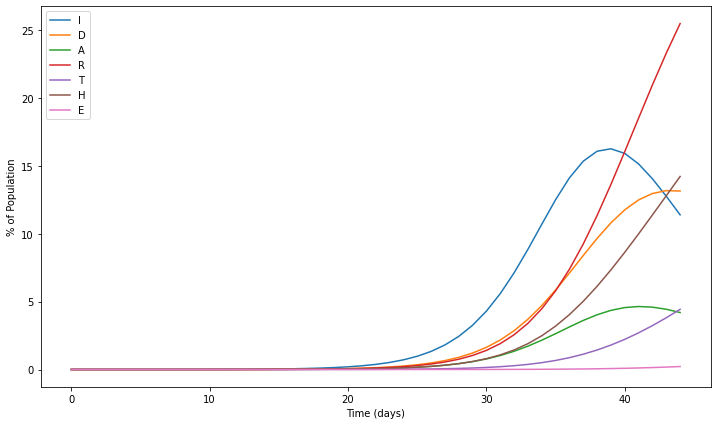

In [36]:
plt.figure(figsize=(12,7))
# plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(D, label="D")
plt.plot(A, label="A")
plt.plot(R, label="R")
plt.plot(T, label="T")
plt.plot(H, label="H")
plt.plot(E, label="E")
plt.xlabel("Time (days)")
plt.ylabel("% of Population")
plt.legend()